The idea is to dump the CKF tracks to a file in the same format as the GNN tracks.
Then we can use the same code to fit those tracks.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
basePath = Path("/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging")
track_perf_columns = ["ndof", "chisq", "charge", "x", 'y', 'z', 'px', 'py', 'pz', "mot", "oot", "trkidx", "eventidx", "barcode", "prob", "pdgid", "status"]
ckf_track_perf_path = basePath / "CKF_noRemoval" /"tracks_evt1-242020_24723.txt"
ckf_track_gnn_setup_path = basePath / "CKF_data_GNN_fitconfig" / "tracks_evt1-242020_24723.txt"
ckf_sameOrder_gnn_setup_path = basePath / "CKF_sameOrder_GNN_fitconfig/" / "tracks_evt1-242020_24723.txt"

In [3]:
def analyze(filename):
    df = pd.read_csv(filename, sep=r"#,", header=None, engine='python')
    ckf_track_info = df[3].str.split(",", expand=True).astype(float)
    ckf_track_info.columns = track_perf_columns
    chi2ndof = np.divide(ckf_track_info['chisq'].values, ckf_track_info['ndof'].values)

    pt = np.sqrt(ckf_track_info['px'].values**2 + ckf_track_info['py'].values**2)
    phi = np.arctan2(ckf_track_info['py'].values, ckf_track_info['px'].values)
    theta = np.arctan2(pt, ckf_track_info['pz'].values)
    p = np.sqrt(pt**2 + ckf_track_info['pz'].values**2)
    qoverp = np.divide(ckf_track_info['charge'].values, p)
    ckf_track_info = ckf_track_info.assign(chi2ndof=chi2ndof, pt=pt, phi=phi, theta=theta, qoverp=qoverp)
    return ckf_track_info


In [4]:
df_org_ckf = analyze(ckf_track_perf_path)
df_gnn_ckf = analyze(ckf_track_gnn_setup_path)
df_gnn_ckf_sameOrder = analyze(ckf_sameOrder_gnn_setup_path)

In [6]:
test_perf_path = basePath / "tracks_evt1-242020_24723.txt"
df_test_perf = analyze(test_perf_path)

pd.concat([df_org_ckf.iloc[0], df_gnn_ckf_sameOrder.iloc[0], df_test_perf.iloc[0]], axis=1)

,0,0,0
ndof,47.000000,47.000000,47.000000
chisq,27.048500,5531.220000,49.827600
charge,-1.000000,-1.000000,-1.000000
x,0.033928,-0.006537,0.028702
y,0.166654,-0.032882,0.141858
z,-13.359600,-16.126400,-13.336600
px,578.324000,617.253000,595.197000
py,-117.738000,-122.702000,-120.428000
pz,-3895.590000,-4119.950000,-4008.570000
mot,27.000000,27.000000,27.000000


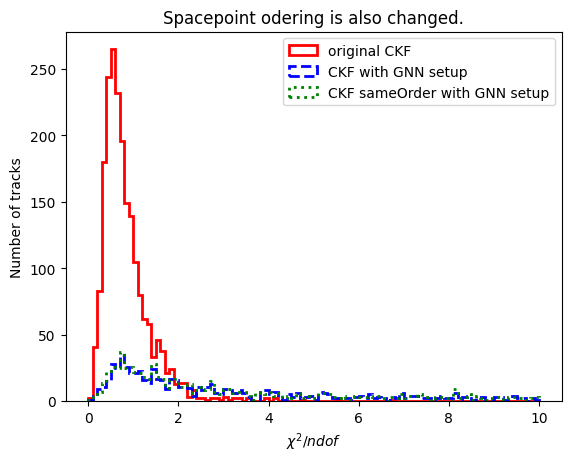

In [64]:
plt.hist(df_org_ckf['chi2ndof'], bins=100, range=(0, 10), label='original CKF', lw=2, histtype='step', color='red')
plt.hist(df_gnn_ckf['chi2ndof'], bins=100, range=(0, 10), label='CKF with GNN setup', lw=2, histtype='step', color='blue', ls='--')
plt.hist(df_gnn_ckf_sameOrder['chi2ndof'], bins=100, range=(0, 10), 
         label='CKF sameOrder with GNN setup', lw=2, histtype='step', color='green', ls=':')
plt.xlabel(r'$\chi^2 / ndof$')
plt.ylabel('Number of tracks')
plt.title("Spacepoint odering is also changed.")
plt.legend();
# plt.savefig("ckf_tracks.pdf")
# plt.savefig("ckf_tracks.png")

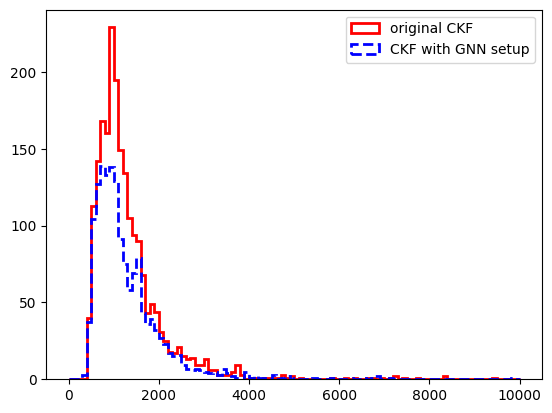

In [60]:
plt.hist(df_org_ckf['pt'], bins=100, range=(0, 10000), label='original CKF', lw=2, histtype='step', color='red')
plt.hist(df_gnn_ckf['pt'], bins=100, range=(0, 10000), label='CKF with GNN setup', lw=2, histtype='step', color='blue', ls='--')
plt.legend();

In [71]:
pd.concat([df_gnn_ckf_sameOrder.iloc[0], df_org_ckf.iloc[0]], axis=1)

,0,0
ndof,47.000000,47.000000
chisq,5531.220000,27.048500
charge,-1.000000,-1.000000
x,-0.006537,0.033928
y,-0.032882,0.166654
z,-16.126400,-13.359600
px,617.253000,578.324000
py,-122.702000,-117.738000
pz,-4119.950000,-3895.590000
mot,27.000000,27.000000


In [67]:
['charge']

ndof          47.000000
chisq         27.048500
charge        -1.000000
x              0.033928
y              0.166654
z            -13.359600
px           578.324000
py          -117.738000
pz         -3895.590000
mot           27.000000
oot            0.000000
trkidx         0.000000
eventidx    5564.000000
barcode      420.000000
prob           1.000000
pdgid       -211.000000
status         1.000000
chi2ndof       0.575500
pt           590.187162
Name: 0, dtype: float64

In [29]:
chi2ndof = np.divide(ckf_track_info['chisq'].values, ckf_track_info['ndof'].values)

(array([  4.,  28.,  34.,  77., 118., 165., 158., 166., 183., 134., 138.,
        117.,  91.,  87.,  82.,  59.,  62.,  41.,  42.,  40.,  26.,  28.,
         32.,  20.,  25.,  16.,  14.,  11.,  11.,  10.,   8.,  11.,   2.,
          3.,   6.,   2.,   1.,   2.,   0.,   1.,   1.,   3.,   0.,   1.,
          3.,   1.,   0.,   2.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.04424889, 0.11108478, 0.17792068, 0.24475658, 0.31159247,
        0.37842837, 0.44526426, 0.51210016, 0.57893605, 0.64577195,
        0.71260785, 0.77944374, 0.84627964, 0.91311553, 0.97995143,
        1.04678732, 1.11362322, 1.18045912, 1.24729501, 1.31413091,
        1.3809668 , 1.4478027 , 1.51463859, 1.

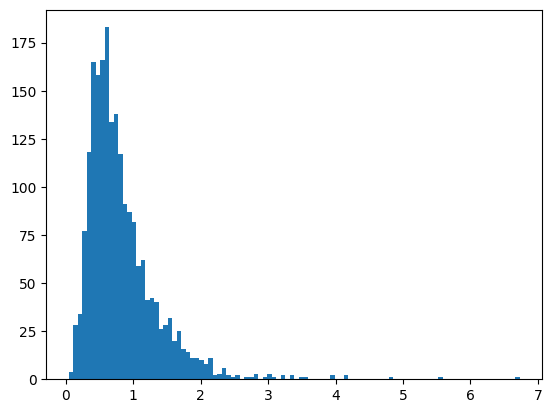

In [31]:
plt.hist(chi2ndof, bins=100)